In [69]:
import numpy as np
import pandas as pd
from time import time,sleep
from random import randint as r
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm
import seaborn as sns
import time
from pandas_profiling import ProfileReport
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn import tree, linear_model
from sklearn.linear_model import SGDRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, plot_confusion_matrix, mean_absolute_error, roc_auc_score

In [4]:
def one_hot(df, columns):
    
    for col in columns:
        
        one_hot = pd.get_dummies(df[col], prefix = col)
        df = pd.concat([df, one_hot], axis = 1)
        df = df.drop([col],  axis = 1)
        
    return df

def Scatterplot(data, variable_1, variable_2, xlab, ylab, color, title, file_name):
    """
    Generates scatterplot of values of two numeric variables in a dataframe.
    
        Parameters
        ----------
        data: Pandas Dataframe
            dataframe including variable_1 and variable_2
        variable_1: Pandas Series
            numeric variable in dataframe for horizontal axis
        variable_2: Pandas Series
            numeric variable in dataframe for vertical axis
        xlab: str
            label for plot x-axis
        ylab: str
            label for plot y-axis
        color: str
            hex code for color (default Distell color = '#EDA411'; default Cape AI color = '#002C4D')
        file_name: str
            file name for the output file
        
        Returns
        -------
        Pandas histogram
            histogram showing frequency distribution of variable
        
    """
    
    # Generate boxplot of 'variable_1' (against 'variable_2' if this is included)
    plt.figure(figsize=(10, 6))
    splot = sns.scatterplot(x=variable_1, y=variable_2,
                          data=data, color=color)
    splot.set_xlabel(xlab, fontsize=20)
    splot.set_ylabel(ylab, fontsize=20)
    splot.tick_params(labelsize=16)
    splot.set_title(title, fontsize=22, loc = 'right')
    plt.savefig(file_name+'.png',bbox_inches = 'tight');
        
def Lineplot(data, variable_1, variable_2, xlab, ylab, color, title, file_name, fill_between = False):
    """
    Generates scatterplot of values of two numeric variables in a dataframe.
    
        Parameters
        ----------
        data: Pandas Dataframe
            dataframe including variable_1 and variable_2
        variable_1: Pandas Series
            numeric variable in dataframe for horizontal axis
        variable_2: Pandas Series
            numeric variable in dataframe for vertical axis
        xlab: str
            label for plot x-axis
        ylab: str
            label for plot y-axis
        color: str
            hex code for color (default Distell color = '#EDA411'; default Cape AI color = '#002C4D')
        file_name: str
            file name for the output file
        
        Returns
        -------
        Pandas histogram
            histogram showing frequency distribution of variable
        
    """
    
    # Generate boxplot of 'variable_1' (against 'variable_2' if this is included)
    plt.figure(figsize=(10, 6))
    lplot = sns.lineplot(x=variable_1, y=variable_2,
                          data=data, color=color)
    lplot.set_xlabel(xlab, fontsize=20)
    lplot.set_ylabel(ylab, fontsize=20)
    lplot.tick_params(labelsize=16)
    lplot.set_title(title, fontsize=22, loc = 'right')
    plt.savefig(file_name+'.png',bbox_inches = 'tight');

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["Feature"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
data = pd.read_csv('abalone.csv')

In [ ]:
data.head()

## Data Quality Issues

#### Values to replace: ? in all variables, check BMI

In [ ]:
data[pd.to_numeric(data['BMI'], errors='coerce').isna()]

#### Values to replace: ? in all variables, '#VALUE!' and '#DIV/0!' in  BMI

In [5]:
data = pd.read_csv('abalone.csv', na_values = ['?', '#VALUE!', '#DIV/0!'], dtype={'Length': float,
                                                                                  'Whole weight': float,
                                                                                  'BMI': float})
data = data.replace({'Gender': {'i': 'I',
                                'm': 'M',
                                'f' : 'F'}})

In [ ]:
abalone_prof_before = ProfileReport(data, progress_bar=False)
abalone_prof_before

#### Check for redundant features & Outliers

In [ ]:
data.hist(figsize=(12,14), color='#86bf91', zorder=2)
plt.savefig('all vars hist before.png',bbox_inches = 'tight');

In [ ]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v

data.corr(method='pearson')

In [ ]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(data['Rings'], data['In Cluster'])
print(fvalue, pvalue)

#### Remove redundant features

In [6]:
data = data.drop(['Width', 'Whole weight', 'BMI', 'ID'], axis = 1)

#### Check for outliers before addressing missing values (Check Excel values)

In [ ]:
temp = data[~data['Length'].isna()]
temp[(temp['Length'] <= np.percentile(temp['Length'], 0.01)) | (temp['Length'] >= np.percentile(temp['Length'], 99.9))]

In [ ]:
temp = data[~data['Height'].isna()]
temp[(temp['Height'] <= np.percentile(temp['Height'], 0.001)) | (temp['Height'] >= np.percentile(temp['Height'], 99.9))]

In [ ]:
data[data['Rings'] >= np.percentile(data['Rings'], 99.9)]

In [ ]:
data[data['Shell Weight'] >= np.percentile(data['Shell Weight'], 99.9)]

#### Remove entries with invalid outliers

In [7]:
remove_indices = [4173,1257,3996,4119,2051,1417]
data = data.drop(remove_indices)

In [ ]:
data.columns

In [ ]:
sns.pairplot(data[['Length','Diameter', 'Height',
       'Shucked weight', 'Viscera Weight', 'Shell Weight', 'Rings']])
plt.savefig('splom.png',bbox_inches = 'tight');

In [ ]:
data.hist(figsize=(12,14), color='#86bf91', zorder=2)
plt.savefig('all vars hist after.png',bbox_inches = 'tight');

#### Split data into features and target

In [8]:
X_cols = list(data.columns)
X_cols.remove('Rings')
X = data[X_cols]
Y = data['Rings']

#### Check which columns have missing values

In [ ]:
nans = X[X['Length'].isna()].index

In [ ]:
X.isna().sum()

#### Impute catagorical missing values with train mode

In [9]:
# values = {'Gender': x_train['Gender'].mode()[0],
#           'Length': x_train['Length'].mean()}

# x_train = x_train.fillna(value=values)
# x_test = x_test.fillna(value=values)

In [10]:
values = {'Gender': X['Gender'].mode()[0]}
X = X.fillna(value=values)

In [11]:
#### One-hot encode 'Gender' and 'In Cluster'

In [12]:
columns = ['Gender', 'In Cluster']
X = one_hot(X, columns)
feature_list = list(X.columns)

In [13]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
cols = X.columns
ind = X.index

X = pd.DataFrame(imputer.fit_transform(X), columns = cols, index = ind)

#### Test-train split

In [11]:
from sklearn.model_selection import train_test_split
split = 0.2

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = split, random_state = 42)

#### Normalise all features

In [ ]:
# from sklearn import preprocessing

# min_max_scaler = preprocessing.MinMaxScaler()
# x_train = min_max_scaler.fit_transform(x_train)
# x_test = min_max_scaler.fit_transform(x_test)

#### Check for Multi-collinearity

In [ ]:
calc_vif(x_train)

#### Attempt dropping Diameter, Viscera Weight and Shucked Weight

In [ ]:
# x_train = x_train.drop(['Diameter', 'Shucked weight', 'Viscera Weight'], axis=1)
# x_test = x_test.drop(['Diameter', 'Shucked weight', 'Viscera Weight'], axis=1)

In [12]:
print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (3336, 11)
Training Labels Shape: (3336,)
Testing Features Shape: (835, 11)
Testing Labels Shape: (835,)


In [13]:
#The baseline predictions are the average of OTIF
baseline_preds = np.average(y_train)
baseline_errors = abs(baseline_preds - y_test)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  2.48


#### Model Fitting

In [67]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn import tree, linear_model
from sklearn.linear_model import SGDRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, plot_confusion_matrix, mean_absolute_error, roc_auc_score

In [12]:
# Start Timer
start = time.time()

int_time = round((time.time() - start), 4)
dtr = tree.DecisionTreeRegressor().fit(x_train, y_train)
# RandomForestRegressor(n_estimators = 300, random_state = 42)
print("DT Trained with training time: ", round((time.time() - start) - int_time, 4), "sec")

int_time = round((time.time() - start), 4)
rf = RandomForestRegressor(n_estimators = 300).fit(x_train, y_train)
# RandomForestRegressor(n_estimators = 300, random_state = 42)
print("RF Trained with training time: ", round((time.time() - start) - int_time, 4), "sec")

int_time = round((time.time() - start), 4)
rf2 = RandomForestRegressor(n_estimators = 300, max_depth=7, random_state=9, criterion='mse', min_samples_split=2).fit(x_train, y_train)
# RandomForestRegressor(n_estimators = 300, random_state = 42)
print("RF Trained with training time: ", round((time.time() - start) - int_time, 4), "sec")

int_time = round((time.time() - start), 4)
xgb = xgb.XGBRegressor(n_estimators  = 1000, objective="reg:squarederror", random_state=42).fit(x_train, y_train)
print("XGB Trained with training time: ", round((time.time() - start) - int_time, 4), "sec")

int_time = round((time.time() - start), 4)
svm = make_pipeline(StandardScaler(), SVR(kernel='rbf')).fit(x_train, y_train)
print("SVM Trained with training time: ", round((time.time() - start) - int_time, 4), "sec")

int_time = round((time.time() - start), 4)
knn = KNeighborsRegressor().fit(x_train, y_train)
print("KNN Trained with training time: ", round((time.time() - start) - int_time, 4), "sec")

int_time = round((time.time() - start), 4)
glm = linear_model.LinearRegression().fit(x_train, y_train)
print("GLM Trained with training time: ", round((time.time() - start) - int_time, 4), "sec")

int_time = round((time.time() - start), 4)
per = linear_model.Perceptron().fit(x_train, y_train)
print("Perceptron Trained with training time: ", round((time.time() - start) - int_time, 4), "sec")

int_time = round((time.time() - start), 4)
grad_dec = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000)).fit(x_train, y_train)
print("Gradient Descent Trained with training time: ", round((time.time() - start) - int_time, 4), "sec")

print('--------')
int_time = round((time.time() - start), 4)
mlp1 = MLPRegressor(max_iter=1000).fit(x_train, y_train)
print("MLP Trained with training time: ", round((time.time() - start) - int_time, 4), "sec")
print('--------')

int_time = round((time.time() - start), 4)
mlp_gs = MLPRegressor(random_state=9, max_iter=1000, solver='lbfgs', alpha=0.01, hidden_layer_sizes=(4,11), learning_rate='adaptive', activation='logistic').fit(x_train, y_train)
print("MLP GS Trained with training time: ", round((time.time() - start) - int_time, 4), "sec")
print('--------')

int_time = round((time.time() - start), 4)
mlp_gs2 = MLPRegressor(random_state=42, max_iter=1000, solver='adam', alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate='adaptive', activation='relu').fit(x_train, y_train)
print("MLP GS Trained with training time: ", round((time.time() - start) - int_time, 4), "sec")
print('--------')

int_time = round((time.time() - start), 4)
ada = AdaBoostRegressor(n_estimators=1000).fit(x_train, y_train)
print("Adaboost Trained with training time: ", round((time.time() - start) - int_time, 4), "sec")

int_time = round((time.time() - start), 4)
gb = GradientBoostingRegressor(n_estimators=50).fit(x_train, y_train)
print("Gradient Boost Trained with training time: ", round((time.time() - start) - int_time, 4), "sec")

int_time = round((time.time() - start), 4)
gb2 = GradientBoostingRegressor(max_depth=3, learning_rate=0.15, max_features=8, min_samples_split=2, min_samples_leaf=1).fit(x_train, y_train)
print("Gradient Boost Trained with training time: ", round((time.time() - start) - int_time, 2), "sec")

models = ['dtr', 'rf', 'rf2', 'xgb', 'svm', 'knn', 'glm', 'per', 'grad_dec', 'mlp1', 'mlp_gs', 'mlp_gs2', 'ada', 'gb', 'gb2']

DT Trained with training time:  0.0211 sec
RF Trained with training time:  3.4634 sec
RF Trained with training time:  1.677 sec
XGB Trained with training time:  2.8446 sec
SVM Trained with training time:  0.4633 sec
KNN Trained with training time:  0.0118 sec
GLM Trained with training time:  0.0038 sec
Perceptron Trained with training time:  0.0444 sec
Gradient Descent Trained with training time:  0.0107 sec
--------
MLP Trained with training time:  4.7817 sec
--------


C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLP GS Trained with training time:  3.3219 sec
--------
MLP GS Trained with training time:  3.9359 sec
--------
Adaboost Trained with training time:  0.2087 sec
Gradient Boost Trained with training time:  0.1966 sec
Gradient Boost Trained with training time:  0.25 sec


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
df_regressor = RandomForestRegressor(random_state=4)

params_RF = {'criterion': ['mse', 'mae'],
             'max_depth': [1, 3, 5, 7],
             'min_samples_split': [2, 3]}

cv_method = RepeatedStratifiedKFold(n_splits=2,n_repeats=1,random_state=9) 

gs_RF = GridSearchCV(estimator=df_regressor,param_grid=params_RF,
                     cv=cv_method,verbose=1)

gs_RF.fit(x_train, y_train) 
gs_RF.best_params_

In [46]:
int_time = round((time.time() - start)/60, 2)
mlp = MLPRegressor(max_iter=1000)
parameter_space = {
    'hidden_layer_sizes': [(5,10), (50,50,50), (50,100,50), (50,50), (100,50), (100,)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.001],
    'learning_rate': ['adaptive'],
    'random_state' : [9]
}

mlp_gs = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3).fit(x_train, y_train)
print("MLP Grid Search Trained with training time: ", round((time.time() - start)/60 - int_time, 2), "min")

MLP Grid Search Trained with training time:  0.21 min


In [47]:
# Best paramete set
print('Best parameters found:\n', mlp_gs.best_params_)

# All results
means = mlp_gs.cv_results_['mean_test_score']
stds = mlp_gs.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, mlp_gs.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'random_state': 9, 'solver': 'adam'}
0.513 (+/-0.018) for {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (5, 10), 'learning_rate': 'adaptive', 'random_state': 9, 'solver': 'adam'}
0.534 (+/-0.024) for {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'random_state': 9, 'solver': 'adam'}
0.524 (+/-0.051) for {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'random_state': 9, 'solver': 'adam'}
0.531 (+/-0.026) for {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'random_state': 9, 'solver': 'adam'}
0.528 (+/-0.037) for {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'adaptive', 'random_state': 9, 'solver': 'adam'}
0.516 (+/-0.023) for {'activation': 

In [13]:
predictions_dtr = dtr.predict(x_test)
predictions_rf = rf.predict(x_test)
predictions_rf2 = rf2.predict(x_test)
predictions_xgb = xgb.predict(x_test)
predictions_svm = svm.predict(x_test)
predictions_knn = knn.predict(x_test)
predictions_glm = glm.predict(x_test)
predictions_per = per.predict(x_test)
predictions_grad_dec = grad_dec.predict(x_test)
predictions_mlp1 = mlp1.predict(x_test)
predictions_mlp_gs = mlp_gs.predict(x_test)
predictions_mlp_gs2 = mlp_gs2.predict(x_test)
predictions_ada = ada.predict(x_test)
predictions_gb = gb.predict(x_test)
predictions_gb2 = gb2.predict(x_test)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score, plot_confusion_matrix, mean_absolute_error, roc_auc_score

In [14]:
metrics = pd.DataFrame()
i=0
for model in models:
    pred_str = 'predictions_' + model
#     print('Mean Absolute Error ', model, " = ", mean_absolute_error(y_test, globals()[pred_str]))
    metrics.loc[i, 'Model'] = model
    metrics.loc[i, 'MAE'] = mean_absolute_error(y_test, globals()[pred_str])
    metrics.loc[i, 'MSE'] = mean_squared_error(y_test, globals()[pred_str])
    metrics.loc[i, 'R^2'] = r2_score(y_test, globals()[pred_str])
      
    i = i+1
metrics  

,Model,MAE,MSE,R^2
0,dtr,2.046707,8.729341,0.241423
1,rf,1.577669,4.830008,0.580274
2,rf2,1.531694,4.707191,0.590947
3,xgb,1.705743,5.472147,0.524472
4,svm,1.536533,5.139937,0.553341
5,knn,1.653174,5.550946,0.517625
6,glm,1.622259,5.005443,0.565029
7,per,2.087425,9.800000,0.148383
8,grad_dec,1.624799,5.016036,0.564108
9,mlp1,1.630996,4.866569,0.577097


In [15]:
# Start Timer
start = time.time()

int_time = round((time.time() - start), 4)
rf2 = RandomForestRegressor(n_estimators = 300, max_depth=7, random_state=9, criterion='mse', min_samples_split=2).fit(x_train, y_train)
# RandomForestRegressor(n_estimators = 300, random_state = 42)
print("RF Trained with training time: ", round((time.time() - start) - int_time, 4), "sec")

int_time = round((time.time() - start), 4)
mlp_gs2 = MLPRegressor(random_state=42, max_iter=1000, solver='adam', alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate='adaptive', activation='relu').fit(x_train, y_train)
print("MLP GS Trained with training time: ", round((time.time() - start) - int_time, 4), "sec")

int_time = round((time.time() - start), 4)
gb2 = GradientBoostingRegressor(max_depth=3, learning_rate=0.15, max_features=8, min_samples_split=2, min_samples_leaf=1).fit(x_train, y_train)
print("Gradient Boost Trained with training time: ", round((time.time() - start) - int_time, 2), "sec")

models = ['rf2', 'mlp_gs2', 'gb2']

predictions_rf2 = rf2.predict(x_test)
predictions_mlp_gs = mlp_gs.predict(x_test)
predictions_gb2 = gb2.predict(x_test)

metrics = pd.DataFrame()
i=0
for model in models:
    pred_str = 'predictions_' + model
#     print('Mean Absolute Error ', model, " = ", mean_absolute_error(y_test, globals()[pred_str]))
    metrics.loc[i, 'Model'] = model
    metrics.loc[i, 'MAE'] = mean_absolute_error(y_test, globals()[pred_str])
    metrics.loc[i, 'MSE'] = mean_squared_error(y_test, globals()[pred_str])
    metrics.loc[i, 'R^2'] = r2_score(y_test, globals()[pred_str])
      
    i = i+1
metrics 

RF Trained with training time:  1.7087 sec
MLP GS Trained with training time:  2.8473 sec
Gradient Boost Trained with training time:  0.34 sec


,Model,MAE,MSE,R^2
0,rf2,1.531694,4.707191,0.590947
1,mlp_gs2,1.483711,4.525173,0.606764
2,gb2,1.532488,4.701904,0.591406


#### Train performance


In [16]:
predictions_rf2 = rf2.predict(x_train)
predictions_mlp_gs2 = mlp_gs2.predict(x_train)
predictions_gb2 = gb2.predict(x_train)

metrics = pd.DataFrame()
i=0
for model in models:
    pred_str = 'predictions_' + model
#     print('Mean Absolute Error ', model, " = ", mean_absolute_error(y_test, globals()[pred_str]))
    metrics.loc[i, 'Model'] = model
    metrics.loc[i, 'MAE'] = mean_absolute_error(y_train, globals()[pred_str])
    metrics.loc[i, 'MSE'] = mean_squared_error(y_train, globals()[pred_str])
    metrics.loc[i, 'R^2'] = r2_score(y_train, globals()[pred_str])
      
    i = i+1
metrics 

,Model,MAE,MSE,R^2
0,rf2,1.288429,3.216749,0.681783
1,mlp_gs2,1.457249,4.498603,0.554976
2,gb2,1.330236,3.406491,0.663013


In [ ]:
# Get numerical feature importances
importances = list(gb2.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

In [68]:
splits = [0.045, 0.046,0.047,0.048,0.049,0.050,0.051,0.052,0.053,0.054,0.055]

for split in splits:
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = split, random_state = 42)

#     values = {'Gender': x_train['Gender'].mode()[0],
#               'Length': x_train['Length'].mean()}

#     x_train = x_train.fillna(value=values)
#     x_test = x_test.fillna(value=values)

#     columns = ['Gender', 'In Cluster']
#     x_train = one_hot(x_train, columns)
#     x_test = one_hot(x_test, columns)
    
    int_time = round((time.time() - start), 4)
    mlp_gs2 = MLPRegressor(random_state=42, max_iter=1000, solver='adam', alpha=0.001, hidden_layer_sizes=(50, 50, 50), learning_rate='adaptive', activation='relu').fit(x_train, y_train)
#     print("MLP GS Trained with training time: ", round((time.time() - start) - int_time, 4), "sec")
    predictions_mlp_gs = mlp_gs2.predict(x_test)
    print('MSE for ', split, ' is ', mean_squared_error(y_test, predictions_mlp_gs))
    print('R2 Score for ', split, ' is ', r2_score(y_test, predictions_mlp_gs))

MSE for  0.045  is  4.30003018375057
R2 Score for  0.045  is  0.6195652297186165
MSE for  0.046  is  4.242512264830395
R2 Score for  0.046  is  0.6218227160533436
MSE for  0.047  is  4.41980314344554
R2 Score for  0.047  is  0.6036322583616917
MSE for  0.048  is  4.0390511472561625
R2 Score for  0.048  is  0.6374964336484205
MSE for  0.049  is  4.097777768758185
R2 Score for  0.049  is  0.6311696342902797
MSE for  0.05  is  4.028149760100575
R2 Score for  0.05  is  0.633902855330712
MSE for  0.051  is  4.032734089034383
R2 Score for  0.051  is  0.6319845020770122
MSE for  0.052  is  4.188679768190225
R2 Score for  0.052  is  0.6238060567601564
MSE for  0.053  is  4.048937440428926
R2 Score for  0.053  is  0.6303738852486938
MSE for  0.054  is  3.921599284451641
R2 Score for  0.054  is  0.636920022454353
MSE for  0.055  is  4.114545386022754
R2 Score for  0.055  is  0.6165942382938105


#### Test-train split

In [14]:
from sklearn.model_selection import train_test_split
split = 0.05

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = split, random_state = 42)

#### Normalise all features

In [71]:
# from sklearn import preprocessing

# min_max_scaler = preprocessing.MinMaxScaler()
# x_train = min_max_scaler.fit_transform(x_train)
# x_test = min_max_scaler.fit_transform(x_test)

#### Check for Multi-collinearity

In [74]:
calc_vif(x_train)

In [46]:
int_time = round((time.time() - start)/60, 2)
mlp = MLPRegressor(max_iter=1000)
parameter_space = {
    'hidden_layer_sizes': [(5,10), (50,50,50), (50,100,50), (50,50), (100,50), (100,)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.001],
    'learning_rate': ['adaptive'],
    'random_state' : [9]
}

mlp_gs = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3).fit(x_train, y_train)
print("MLP Grid Search Trained with training time: ", round((time.time() - start)/60 - int_time, 2), "min")

MLP Grid Search Trained with training time:  0.21 min


In [47]:
# Best paramete set
print('Best parameters found:\n', mlp_gs.best_params_)

# All results
means = mlp_gs.cv_results_['mean_test_score']
stds = mlp_gs.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, mlp_gs.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'random_state': 9, 'solver': 'adam'}
0.513 (+/-0.018) for {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (5, 10), 'learning_rate': 'adaptive', 'random_state': 9, 'solver': 'adam'}
0.534 (+/-0.024) for {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'random_state': 9, 'solver': 'adam'}
0.524 (+/-0.051) for {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'random_state': 9, 'solver': 'adam'}
0.531 (+/-0.026) for {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'random_state': 9, 'solver': 'adam'}
0.528 (+/-0.037) for {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'adaptive', 'random_state': 9, 'solver': 'adam'}
0.516 (+/-0.023) for {'activation': 

In [80]:
scores  = []

In [19]:
# Start Timer
start = time.time()
test_archs = [(50,),(50,50),(50,50,50), (50,50,50,50),(50,50,50,50,50),(50,50,50,50,50,50),(50,50,50,50,50,50,50),(50,50,50,50,50,50,50,50),(50,50,50,50,50,50,50,50,50),(50,50,50,50,50,50,50,50,50,50)]
scores  = []
i=0


hidden_layers = pd.DataFrame()
for arch in test_archs:
    
    int_time = round((time.time() - start), 4)
    mlp_gs2 = MLPRegressor(random_state=42, max_iter=1000, solver='adam', alpha=0.001, hidden_layer_sizes=arch, learning_rate='adaptive', activation='relu').fit(x_train, y_train)
#     print("MLP GS Trained with training time: ", round((time.time() - start) - int_time, 4), "sec")

    predictions_mlp_gs2 = mlp_gs2.predict(x_test)
    hidden_layers.loc[i, 'Hidden Layers'] = i+1
    hidden_layers.loc[i, 'MAE'] = mean_absolute_error(y_test, predictions_mlp_gs2)
    hidden_layers.loc[i, 'MSE'] = mean_squared_error(y_test, predictions_mlp_gs2)
    hidden_layers.loc[i, 'R^2'] = r2_score(y_test, predictions_mlp_gs2)
    i = i+1
    print(i)
hidden_layers

1
2
3
4
5
6
7
8
9
10


,Hidden Layers,MAE,MSE,R^2
0,1.0,1.560570,4.384465,0.601519
1,2.0,1.484755,4.021867,0.634474
2,3.0,1.464114,3.926134,0.643175
3,4.0,1.427423,3.944797,0.641478
4,5.0,1.461606,3.890276,0.646433
5,6.0,1.445527,3.928186,0.642988
6,7.0,1.449407,3.894129,0.646083
7,8.0,1.418316,4.085918,0.628653
8,9.0,1.437865,3.782770,0.656204
9,10.0,1.519227,4.009553,0.635593


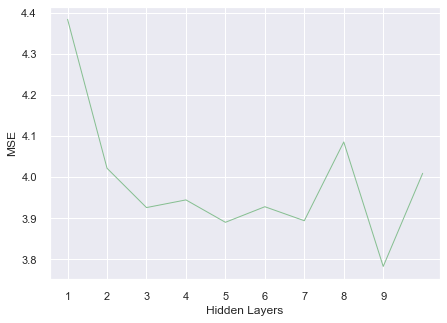

In [40]:
sns.set()

plt.figure(figsize=(7, 5))
ax = sns.lineplot(x='Hidden Layers', y='MSE', data=hidden_layers, lw=1, legend = False, color='#86bf91')
plt.xticks(np.arange(1, 10, 1.0))
plt.savefig('hidden layer grid search.png',bbox_inches = 'tight');

In [41]:
# Start Timer
start = time.time()
test_archs = [(47,47,47,47,47,47,47,47,47),
              (48,48,48,48,48,48,48,48,48),
              (49,49,49,49,49,49,49,49,49),
              (50,50,50,50,50,50,50,50,50),
              (51,51,51,51,51,51,51,51,51),
              (52,52,52,52,52,52,52,52,52)]
scores  = []
i=0


hidden_units = pd.DataFrame()
for arch in test_archs:
    
    int_time = round((time.time() - start), 4)
    mlp_gs2 = MLPRegressor(random_state=42, max_iter=1000, solver='adam', alpha=0.001, hidden_layer_sizes=arch, learning_rate='adaptive', activation='relu').fit(x_train, y_train)
#     print("MLP GS Trained with training time: ", round((time.time() - start) - int_time, 4), "sec")

    predictions_mlp_gs2 = mlp_gs2.predict(x_test)
    hidden_units.loc[i, 'Hidden Units'] = test_archs[i][0]
    hidden_units.loc[i, 'MAE'] = mean_absolute_error(y_test, predictions_mlp_gs2)
    hidden_units.loc[i, 'MSE'] = mean_squared_error(y_test, predictions_mlp_gs2)
    hidden_units.loc[i, 'R^2'] = r2_score(y_test, predictions_mlp_gs2)
    i = i+1
hidden_units

,Hidden Units,MAE,MSE,R^2
0,47.0,1.427425,4.290286,0.610079
1,48.0,1.430738,4.069563,0.630139
2,49.0,1.430314,4.016498,0.634962
3,50.0,1.437865,3.782770,0.656204
4,51.0,1.435020,4.312584,0.608052
5,52.0,1.430645,4.329188,0.606543


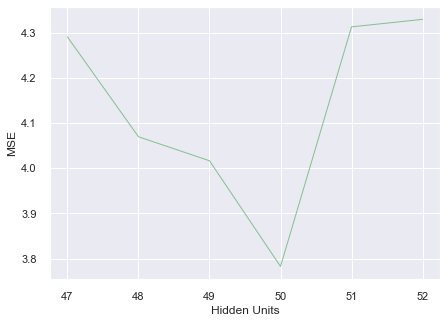

In [46]:
sns.set()

plt.figure(figsize=(7, 5))
ax = sns.lineplot(x='Hidden Units', y='MSE', data=hidden_units, lw=1, legend = False, color='#86bf91')
plt.xticks(np.arange(47, 53, 1.0))
plt.savefig('hidden unit grid search.png',bbox_inches = 'tight');

In [35]:
start = time.time()
int_time = round((time.time() - start)/60, 2)
mlp = MLPRegressor(max_iter=1000)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50,50,50,50,50,50,50)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.0005, 0.001, 0.003, 0.005, 0.01],
    'learning_rate': ['adaptive'],
    'random_state' : [9],
}

mlp_gs = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3).fit(x_train, y_train)
print("MLP Grid Search Trained with training time: ", round((time.time() - start)/60 - int_time, 2), "min")

MLP Grid Search Trained with training time:  0.31 min


In [36]:
# Best paramete set
print('Best parameters found:\n', mlp_gs.best_params_)

# All results
means = mlp_gs.cv_results_['mean_test_score']
stds = mlp_gs.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, mlp_gs.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.005, 'hidden_layer_sizes': (50, 50, 50, 50, 50, 50, 50, 50, 50), 'learning_rate': 'adaptive', 'random_state': 9, 'solver': 'adam'}
0.548 (+/-0.043) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50, 50, 50, 50, 50, 50, 50), 'learning_rate': 'adaptive', 'random_state': 9, 'solver': 'adam'}
0.549 (+/-0.041) for {'activation': 'relu', 'alpha': 0.0005, 'hidden_layer_sizes': (50, 50, 50, 50, 50, 50, 50, 50, 50), 'learning_rate': 'adaptive', 'random_state': 9, 'solver': 'adam'}
0.549 (+/-0.045) for {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50, 50, 50, 50, 50, 50, 50, 50), 'learning_rate': 'adaptive', 'random_state': 9, 'solver': 'adam'}
0.549 (+/-0.043) for {'activation': 'relu', 'alpha': 0.003, 'hidden_layer_sizes': (50, 50, 50, 50, 50, 50, 50, 50, 50), 'learning_rate': 'adaptive', 'random_state': 9, 'solver': 'adam'}
0.553 (+/-0.043) for {'activation': 'relu', 'alpha': 0.005, 'hidd

## FINAL MODEL ARCHITECTURE

In [72]:
start = time.time()
arch = (50,50,50,50,50,50,50,50,50)
int_time = round((time.time() - start), 4)
mlp_gs3 = MLPRegressor(random_state=42, max_iter=1500, solver='adam', alpha=0.005, hidden_layer_sizes=arch, learning_rate='adaptive', activation='relu').fit(x_train, y_train)
#     print("MLP GS Trained with training time: ", round((time.time() - start) - int_time, 4), "sec")

predictions_mlp_gs3 = mlp_gs3.predict(x_test)

print(mean_absolute_error(y_test, predictions_mlp_gs3))
print(mean_squared_error(y_test, predictions_mlp_gs3))
print(r2_score(y_test, predictions_mlp_gs3))

1.4335236958321929
3.7515713980833185
0.659039594191508


#### Training score

In [79]:
arch = (50,50,50,50,50,50,50,50,50)
int_time = round((time.time() - start), 4)
mlp_gs3 = MLPRegressor(random_state=42, max_iter=1500, solver='adam', alpha=0.005, hidden_layer_sizes=arch, learning_rate='adaptive', activation='relu').fit(x_train, y_train)
#     print("MLP GS Trained with training time: ", round((time.time() - start) - int_time, 4), "sec")

predictions_mlp_gs_train = mlp_gs3.predict(x_train)

print(mean_absolute_error(y_train, predictions_mlp_gs3))
print(mean_squared_error(y_train, predictions_mlp_gs3))
print(r2_score(y_train, predictions_mlp_gs3))

ValueError: Found input variables with inconsistent numbers of samples: [3962, 209]

In [62]:
x_train.columns

Index(['Length', 'Diameter', 'Height', 'Shucked weight', 'Viscera Weight',
       'Shell Weight', 'Gender_F', 'Gender_I', 'Gender_M', 'In Cluster_0',
       'In Cluster_1'],
      dtype='object')

In [63]:
x_train2 = x_train.drop(['Diameter', 'Viscera Weight'], axis =1)
x_test2 = x_test.drop(['Diameter', 'Viscera Weight'], axis =1)

arch = (50,50,50,50,50,50,50,50,50)

mlp_gs3 = MLPRegressor(random_state=42, max_iter=500, solver='adam', alpha=0.005, hidden_layer_sizes=arch, learning_rate='adaptive', activation='relu').fit(x_train2, y_train)

predictions_mlp_gs3 = mlp_gs3.predict(x_test2)
    
mae = mean_absolute_error(y_test, predictions_mlp_gs3)
mse = mean_squared_error(y_test, predictions_mlp_gs3)
r2 = r2_score(y_test, predictions_mlp_gs3)

print('MAE = ', mae)
print('MSE = ', mse)
print('R2 = ', r2)

MAE =  1.4546312017032679
MSE =  4.29538028485952
R2 =  0.6096156917669913


In [64]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_train3 = min_max_scaler.fit_transform(x_train)
x_test3 = min_max_scaler.fit_transform(x_test)

arch = (50,50,50,50,50,50,50,50,50)

mlp_gs3 = MLPRegressor(random_state=42, max_iter=500, solver='adam', alpha=0.005, hidden_layer_sizes=arch, learning_rate='adaptive', activation='relu').fit(x_train3, y_train)

predictions_mlp_gs3 = mlp_gs3.predict(x_test3)
    
mae = mean_absolute_error(y_test, predictions_mlp_gs3)
mse = mean_squared_error(y_test, predictions_mlp_gs3)
r2 = r2_score(y_test, predictions_mlp_gs3)

print('MAE = ', mae)
print('MSE = ', mse)
print('R2 = ', r2)

MAE =  1.6881571108791504
MSE =  4.482700702175737
R2 =  0.5925911335946521


#### SMOTE

In [ ]:
import smote_variants as sv

oversampler= sv.MulticlassOversampling(sv.distance_SMOTE())

# X_samp and y_samp contain the oversampled dataset
x_train_res, y_train_res = oversampler.sample(x_train, y_train)

In [25]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
x_train_res, y_train_res = ros.fit_resample(x_train, y_train)

In [51]:
from imblearn.over_sampling import BorderlineSMOTE
sm = BorderlineSMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [68]:
from sklearn import preprocessing

arch = (50,50,50,50,50,50,50,50,50)

mlp_gs3 = MLPRegressor(random_state=42, max_iter=500, solver='adam', alpha=0.005, hidden_layer_sizes=arch, learning_rate='adaptive', activation='relu').fit(x_train_res, y_train_res)

predictions_mlp_gs3 = mlp_gs3.predict(x_test)
    
mae = mean_absolute_error(y_test, predictions_mlp_gs3)
mse = mean_squared_error(y_test, predictions_mlp_gs3)
r2 = r2_score(y_test, predictions_mlp_gs3)

print('MAE = ', mae)
print('MSE = ', mse)
print('R2 = ', r2)

NameError: name 'mean_absolute_error' is not defined

In [70]:
mae = mean_absolute_error(y_test, predictions_mlp_gs3)
mse = mean_squared_error(y_test, predictions_mlp_gs3)
r2 = r2_score(y_test, predictions_mlp_gs3)

print('MAE = ', mae)
print('MSE = ', mse)
print('R2 = ', r2)

MAE =  1.7915168495513394
MSE =  6.031779621769927
R2 =  0.4518035752600138


#### Test different random states

In [136]:
import random
arch = (50,50,50,50,50,50,50,50,50)
iterations = 15
mae=0
mse=0
r2 = 0

averages = pd.DataFrame()
for iteration in range(iterations):
    print(range(iteration+1))
    mae=0
    mse=0
    r2 = 0
    for i in range(iteration+1):
        mlp_gs3 = MLPRegressor(random_state=random.randint(1, 100), max_iter=500, solver='adam', alpha=0.005, hidden_layer_sizes=arch, learning_rate='adaptive', activation='relu').fit(x_train, y_train)

        predictions_mlp_gs3 = mlp_gs3.predict(x_test)

        mae = mae + mean_absolute_error(y_test, predictions_mlp_gs3)
        mse = mse + mean_squared_error(y_test, predictions_mlp_gs3)
        r2 = r2 + r2_score(y_test, predictions_mlp_gs3)
    print(iteration)

    averages.loc[iteration, 'Models Trained'] = iteration
    averages.loc[iteration, 'MAE'] = mae/(iteration+1)
    averages.loc[iteration, 'MSE'] = mse/(iteration+1)
    averages.loc[iteration, 'R^2'] = r2/(iteration+1)

range(0, 1)
0
range(0, 2)
1
range(0, 3)
2
range(0, 4)
3
range(0, 5)
4
range(0, 6)
5
range(0, 7)
6
range(0, 8)
7
range(0, 9)
8
range(0, 10)
9
range(0, 11)
10
range(0, 12)
11
range(0, 13)
12
range(0, 14)
13
range(0, 15)
14


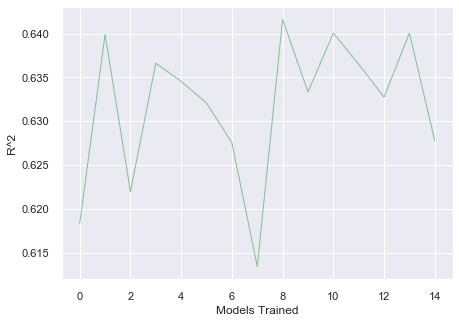

In [141]:
sns.set()

plt.figure(figsize=(7, 5))
ax = sns.lineplot(x='Models Trained', y='R^2', data=averages, lw=1, legend = False, color='#86bf91')
# plt.xticks(np.arange(47, 53, 1.0))
plt.savefig('hidden unit grid search.png',bbox_inches = 'tight');

In [59]:


for iteration in range(iterations):
    mlp_gs3 = MLPRegressor(random_state=random.randint(1, 100), max_iter=500, solver='adam', alpha=0.005, hidden_layer_sizes=arch, learning_rate='adaptive', activation='relu').fit(x_train, y_train)

    predictions_mlp_gs3 = mlp_gs3.predict(x_test)
    
    mae = mae + mean_absolute_error(y_test, predictions_mlp_gs3)
    mse = mse + mean_squared_error(y_test, predictions_mlp_gs3)
    r2 = r2 + r2_score(y_test, predictions_mlp_gs3)
    print(iteration)

print('MAE = ', mae/(iteration+1))
print('MSE = ', mse/(iteration+1))
print('R2 = ', r2/(iteration+1))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
MAE =  1.4648132701639653
MSE =  4.097525691349721
R2 =  0.6275976452834942


In [140]:
np.linspace(0.0001, 1, 10)

array([1.000e-04, 1.112e-01, 2.223e-01, 3.334e-01, 4.445e-01, 5.556e-01,
       6.667e-01, 7.778e-01, 8.889e-01, 1.000e+00])

In [100]:
test_archs = [(50,50,50), (50,50,50,50),(50,50,50,50,50),(50,50,50,50,50,50),(50,50,50,50,50,50,50),(50,50,50,50,50,50,50,50),(50,50,50,50,50,50,50,50,50),(50,50,50,50,50,50,50,50,50,50)]

In [ ]:
plt.figure(figsize=(7, 5))
ax = sns.lineplot(x='Hidden Units', y='MSE', data=hidden_units, lw=1, legend = False, color='#86bf91')
plt.xticks(np.arange(47, 53, 1.0))
plt.savefig('hidden unit grid search.png',bbox_inches = 'tight');

<Figure size 720x576 with 0 Axes>

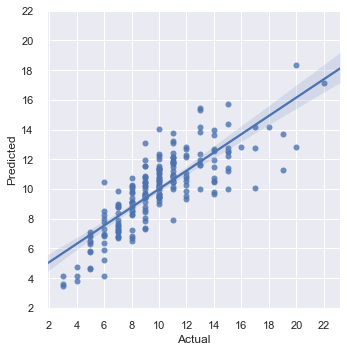

In [119]:
sns.set()
plt.figure(figsize=(10, 8))
ax = sns.lmplot(x='Actual', y='Predicted', data=pred_actual)
plt.xticks(np.arange(2, 24, 2))
plt.yticks(np.arange(2, 23, 2))
plt.savefig('scatter test',bbox_inches = 'tight');

<Figure size 1440x1152 with 0 Axes>

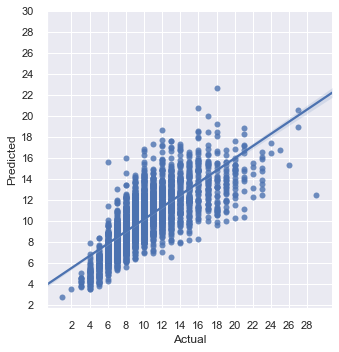

In [118]:
pred_actual_train = pd.concat([y_train.reset_index().drop('index', axis=1), pd.Series(predictions_mlp_gs_train)], axis=1, ignore_index=True).rename(columns={0:"Actual", 1:"Predicted"})
# sns.set()
plt.figure(figsize=(20, 16))
ax = sns.lmplot(x='Actual', y='Predicted', data=pred_actual_train)
plt.xticks(np.arange(2, 30, 2))
plt.yticks(np.arange(2, 32, 2))
plt.savefig('scatter train',bbox_inches = 'tight');

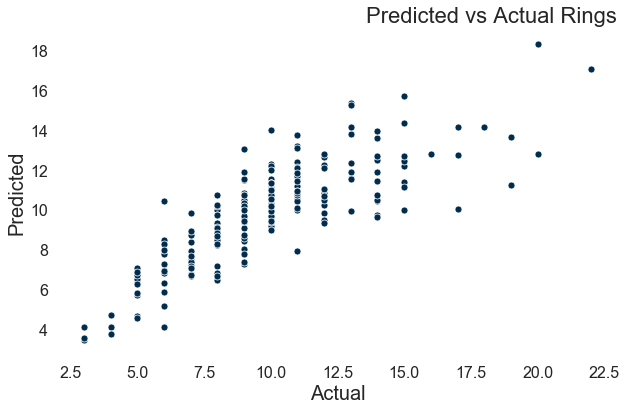

In [75]:
pred_actual = pd.concat([y_test.reset_index().drop('index', axis=1), pd.Series(predictions_mlp_gs3)], axis=1, ignore_index=True).rename(columns={0:"Actual", 1:"Predicted"})
Scatterplot(pred_actual, 'Actual', 'Predicted',
            'Actual', 'Predicted',
            '#002C4D',
            'Predicted vs Actual Rings',
            'Actual vs Predicted')

In [ ]:
sns.set()
lw = 2
y=predictions_mlp_gs
X=y_test
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 8), sharey=True)

axes.scatter(X,y,facecolor="g", edgecolor="g", s=30,label='Data Points')

# axes.legend(loc='best',framealpha = 0.9, facecolor='w',fontsize='medium',
#                 ncol=1, fancybox=False, shadow=False)

fig.text(0.5, 0.04, 'Rings Actual', ha='center', va='center', fontsize=16)
fig.text(0.08, 0.5, 'Rings Predicted', ha='center', va='center', rotation='vertical', fontsize=16)
fig.suptitle("Actual vs. Predicted Multilayer Perceptron", fontsize=20)
plt.xticks(np.arange(2, 23, step=1))
plt.yticks(np.arange(4, 20, step=2))

plt.tick_params(labelsize=12)

plt.show()

# plt.savefig('SVM Q5 Test Set Chris.png',bbox_inches = 'tight');